# Assignment 2 - Mining Frequent Pattern and Asssociation Rules
This answer sheet contains your answer to questions in Section 1~3. Sentences in <span style="color:blue">blue</span> indicates questions to be answered. 

For open questions, please organize your answer into "points" to ease our grading efforts. For example, an answer to "What is the most popular item? Explain you answer and describe any assumptions you’ve made." should look like:

> The most popular item ID is 12345. The reason is that:
> - reason 1
> - reason 2
> 
> I've made the following assumptions:
> - assumption 1
> - assumption 2

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Remember to save this Jupyter notebook as __YourNameInIVLE_YourIDInIVLE.ipynb__.

**Import all libraries and load data here**

In [1]:
# data manipulation
import pandas as pd
import numpy as np
import math
import random

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

from efficient_apriori import apriori

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

sales = pd.read_csv("record.csv") 
print(sales.dtypes)
display(sales.head())

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0


## Section 1 - Data Cleaning and Exploration (20 points)

<span style="color:blue"> Please provide a description of each of the types of “dirty” records that you can find in the dataset, as well as the corresponding number of such records that are to be removed the dataset. Also, write down your code for removing those records. </span>

We make the following assumptions in order to delete any records with "dirty" data:

- Fields that are blank, NaN or empty strings are considered dirty and rows deleted
- We are only interested in sales, no returns or cancellations, therefore Quantity or UnitPrice with negative values are considered dirty and deleted

In [2]:
print("Number of invalid or empty rows in each column:")
display(sales.isna().sum())
sales_clean = sales.dropna()
sales_clean = sales_clean[sales_clean['UnitPrice']!=0]
sales_clean = sales_clean[sales_clean['Quantity']>0]
print("Number of entries in cleaned set: {}".format(len(sales_clean.index)))

print("Earliest date found: {}".format(sales_clean.InvoiceDate.min()))
print("Latest date found: {}".format(sales_clean.InvoiceDate.max()))

sales_customers = sales_clean.CustomerID.unique()
print("Number of unique customers: {}".format(len(sales_customers)))

sales_transactions = sales_clean.InvoiceNo.unique()
print("Number of unique Transactions: {}".format(len(sales_transactions)))

sales_items = sales_clean.StockCode.unique()
print("Number of unique Items: {}".format(len(sales_items)))

customer_17850 = sales_clean[sales_clean.CustomerID == 17850]
customer_17850_transactions = customer_17850.InvoiceNo.unique()
print("Number of unique Transactions for 17850: {}".format(len(customer_17850_transactions)))

unique_transactions = sales_clean.drop_duplicates('InvoiceNo')
unique_transactions_by_cust_id = unique_transactions.groupby('CustomerID')['InvoiceNo'].nunique()
print("Customer ID with the most transactions: {} with a total of {} transactions"
        .format(unique_transactions_by_cust_id.idxmax(), unique_transactions_by_cust_id.max()))

items_sold = sales_clean[['StockCode','Quantity']].sort_values('StockCode')

items_sold_grouped = items_sold.groupby(['StockCode']).sum().Quantity
print("Item ID with the most sales: {} with a total of {} items sold".format(items_sold_grouped.idxmax(),
                                                                              items_sold_grouped.max()))
display(sales_clean[sales_clean['StockCode']=='23843'])

Number of invalid or empty rows in each column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

Number of entries in cleaned set: 397884
Earliest date found: 2010-12-01 08:26:00
Latest date found: 2011-12-09 12:50:00
Number of unique customers: 4338
Number of unique Transactions: 18532
Number of unique Items: 3665
Number of unique Transactions for 17850: 34
Customer ID with the most transactions: 12748.0 with a total of 209 transactions
Item ID with the most sales: 23843 with a total of 80995 items sold


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0


<span style="color:blue"> 1)~8) Please provide the answers to the questions listed in the table. </span>

This is a markdown cell. Please fill in your answer for (1)~(8).

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 1)  | Starting date of the dataset?                                                                              | _2010-12-01 08:26:00_ |
| 2)  | Ending date of the dataset?                                                                                | _2011-12-09 12:50:00_ |
| 3)  | Number of customers?                                                                                       | _4338_ |
| 4)  | Number of transactions?                                                                                    | _18532_ |
| 5)  | Number of different kind of items?                                                                         | _3665_ |
| 6)  | Number of transactions customer ID 17850 has made?                                                         | _34_ |
| 7)  | Which customer (ID) has made the most transactions?                                                        | _12748_ |
| 8)  | What is the item ID of the best-seller? We define "best-seller" as the item with the highest sales volume. | _23843_ |

<span style="color:blue"> 9) Next, let us get some general understanding about the transactions.  Please make a histogram of the number of unique items per transaction and describe one insight that you can observe from the plot, and explain why you find it interesting.  </span>

1
542
21.470105763004533
15.0


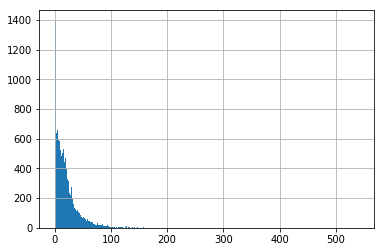

In [3]:
sales_by_transaction = sales_clean.groupby(['InvoiceNo'])
print(sales_by_transaction.StockCode.count().min())
print(sales_by_transaction.StockCode.count().max())
print(sales_by_transaction.StockCode.count().mean())
print(sales_by_transaction.StockCode.count().median())
display(sales_by_transaction.StockCode.count().hist(bins=range(0,542)))

This store has a wide variety of selections available for purchase. While they are not a shop that sells a number of unique items in each transaction, their sales are significant in general, having a number of transactions in which they sell more than 100 items and a record selling in one same invoice of 542 items. While the big mayority of invoices stay at the 1 item sellpoint, the average items sold is 21 items per invoice.

<span style="color:blue"> 10) We can also explore the data based on the items.  Let us make a bar plot of the items with support higher than 5%. Please describe one insight that you can observe from the plot, and explain how it can be related to rule mining. </span>

Number of unique transactions: 18532


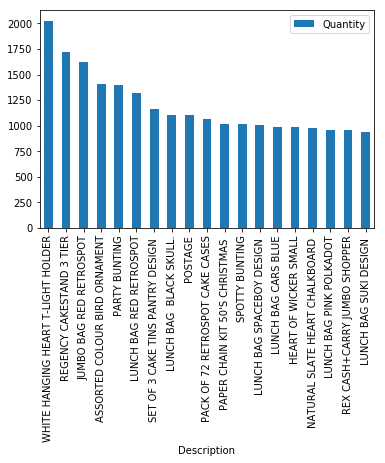

In [4]:
print("Number of unique transactions: {}".format(len(unique_transactions)))
items_sold_by_descriptions = sales_clean[['Description','Quantity']].sort_values('Description')
items_sold_by_description_grouped = items_sold_by_descriptions.groupby(['Description']).count()

five_percent = items_sold_by_description_grouped[
    items_sold_by_description_grouped[
        'Quantity']/len(unique_transactions)>0.05].sort_values('Quantity', ascending=False)
five_percent.plot.bar()

#items_sold_by_description_grouped[items_sold_by_description_grouped['Quantity']/len(unique_transactions)>0.05].plot.bar(x='Description', y='Quantity')


- Only 19 items out of the total 3,665 are found to have a support higher than 5%. Meaning that across all the 18,532 transactions only these 19 items appear in 5% or more of them. 
- While this could be a trace of an item's popularity, it can also be taken as the commonality of these items and their usual demand for the store.

<span style="color:blue"> 11) Compare the “best-seller” that you have previously found in (8) and the item with the highest support that you have just found in (10). Which item do you think is more popular? Here we define the “popular” items as items that are bought by many customers. Explain you answer and describe any assumptions you’ve made. </span>

- Best-seller was PAPER CRAFT , LITTLE BIRDIE
- The item with the most support is WHITE-HANGING HEART T-LIGHT HOLDER. 
- The reason why the little birdie papercraft is the best seller is because of one single order that came by an amount of 80995 for a single client. 
- Light Holder appears in multiple invoices by multiple customers. This will make the T-Light holder the more popular item

## Section 2 - Mining Association Rules

<span style="color:blue"> 1) Will we complete the counting before the sun burns out (the sun has another $ 5 \times 10^9 < 2^{33} $ years to burn)? </span>

<span>If we are considering a brute-force approach to count the number of association rules:
There are a total of 3665 items which is a total of $ 4.460 \times 10^{1748} $ sets. Even if they were done at a rate of $ 2^{36} $ items per second, it would take us the humble amount of $ 2.0566 \times 10^{1730} $ years... so yes the sun would be out by then </span>

<span style="color:blue"> 2) Run efficient-apriori in python with min_support=0.5%, min_confidence=20%, max_length=4. Write down the rule with the highest lift (denoted as $r_1$). </span>

In [5]:
sales_by_transaction = sales_clean.groupby(['InvoiceNo'])
transactions = list()
for name, group in sales_by_transaction:
    transactions.append(tuple(group.StockCode.values))

%timeit -n 1 -r 1 itemsets, rules = apriori(transactions, min_support=0.005,  min_confidence=0.2, max_length=4)

14min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
itemsets, rules = apriori(transactions, min_support=0.005,  min_confidence=0.2, max_length=4)
r1 = 0
rule1 = rules[0]
for rule in rules:
    if rule.lift > r1:
        r1 = rule.lift
        rule1 = rule
print("Highest Lift: {}".format(r1))
print(rule1)

Highest Lift: 128.10138248847926
{22698, 23171} -> {22697, 23172} (conf: 0.823, supp: 0.006, lift: 128.101, conv: 5.600)


{22698, 23171} -> {22697, 23172} (conf: 0.823, supp: 0.006, lift: 128.101, conv: 5.600)

<span style="color:blue"> 3) Run efficient-apriori in python with min_support=1%, min_confidence=20%, max_length=4. Write down the rule with the highest lift (denoted as $r_2$). </span>

In [8]:
%timeit -n 1 -r 1 itemsets2, rules2 = apriori(transactions, min_support=0.01,  min_confidence=0.2, max_length=4)


5min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
itemsets2, rules2 = apriori(transactions, min_support=0.01,  min_confidence=0.2, max_length=4)
r2 = 0
rule2 = rules2[0]
for rule in rules2:
    if rule.lift > r2:
        r2 = rule.lift
        rule2 = rule
print("Highest Lift: {}".format(r2))
print(rule2)

Highest Lift: 61.89589947089947
{23172} -> {23171} (conf: 0.902, supp: 0.011, lift: 61.896, conv: 10.033)


{23172} -> {23171} (conf: 0.902, supp: 0.011, lift: 61.896, conv: 10.033)

<span style="color:blue"> 4) Run efficient-apriori in python with min_support=0.5%, min_confidence=40%, max_length=4. Write down the rule with the highest lift (denoted as $r_3$). </span>

In [10]:
%timeit -n 1 -r 1 itemsets3, rules3 = apriori(transactions, min_support=0.005,  min_confidence=0.4, max_length=4)


15min 35s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
itemsets3, rules3 = apriori(transactions, min_support=0.005,  min_confidence=0.4, max_length=4)
r3 = 0
rule3 = rules3[0]
for rule in rules3:
    if rule.lift > r3:
        r3 = rule.lift
        rule3=rule
print("Highest Lift: {}".format(r3))
print(rule3)

Highest Lift: 128.10138248847926
{22698, 23171} -> {22697, 23172} (conf: 0.823, supp: 0.006, lift: 128.101, conv: 5.600)


{22698, 23171} -> {22697, 23172} (conf: 0.823, supp: 0.006, lift: 128.101, conv: 5.600)

<span style="color:blue"> 5) You must have noticed numerous differences between the two runs in (2) and (3). List at least 3 differences you’ve found. You may want to consider the elapsed time and the quality of the results.  </span>

- For this particular cleaned set, run 3 was almost identical on results and time to run 1
- Run 2 is significantly faster than run 3 thanks to a higher threshold on support
- Run 3 returns a much higher lift on the best rule found across the set thanks to a wider pool of rules to analyze

<span style="color:blue"> 6) Which one in $r_1$,$r_2$, and $r_3$ do you think is better? Explain your answer. </span>

R3. Despite being basically the same as R1, a higher minimum confidence allows for more significant results and it performed better on returning a higher lift than R2

<span style="color:blue"> 7) From your observation, what are the effects of increasing/reducing min_support and min_confidence? Support your answer with evidence. </span>

- Increasing min_support reduces the processing time but also the quality of the results
- Increasing the minimum confidence returns less rules, however they will be more significant and impactful due to being stricter

## Section 3 - Mining Sequential Rules

<span style="color:blue"> 1) Organize the dataset into sequences and fill the table below. </span>

In [12]:
sales_by_date = sales_clean.sort_values(['InvoiceDate'])
customers = sales_by_date.CustomerID.unique()
sequences = pd.DataFrame(columns=['CustomerID', 'Beginning Date of Sequence',
                                  'Ending Date of Sequence', 'Number of transactions in the sequence'])
for customer in customers:
    sequences = sequences.append({'CustomerID': customer,
                     'Beginning Date of Sequence': sales_by_date[sales_by_date['CustomerID']==customer].InvoiceDate.min(),
                     'Ending Date of Sequence': sales_by_date[sales_by_date['CustomerID']==customer].InvoiceDate.max(),
                     'Number of transactions in the sequence': len(sales_by_date[sales_by_date['CustomerID']==customer].InvoiceNo.unique())},
                    ignore_index=True)
sequences[sequences.CustomerID == 12356]


,CustomerID,Beginning Date of Sequence,Ending Date of Sequence,Number of transactions in the sequence
1103,12356.0,2011-01-18 09:50:00,2011-11-17 08:40:00,3


Answered in the above code cell. Keeping the Markdown cell for reference.

| CustomerID | Beginning Date of Sequence | Ending Date of Sequence | Number of transactions in the sequence |
|:----------:|:--------------------------:|:-----------------------:|:--------------------------------------:|
|    12356   |        2011-01-18 09:50:00        |       2011-11-17 08:40:00 	      |              3              |

<span style="color:blue"> 2) Run ERMiner with min_support=0.5%, min_confidence=60%, maximum length of antecedent and consequence being 1. Write down the rule(s) with the highest confidence. </span> You need to convert the dataset into the format that SPMF supports. Please read http://www.philippe-fournier-viger.com/spmf/ERMiner.php carefully.

In [13]:
stock_codes = sales_by_date.StockCode.unique()
d = {'StockCode': stock_codes}
stock_codes_df = pd.DataFrame(data = d)
ERMiner = open('ERMiner.txt', mode='w')

transaction_sales = sales_by_date.groupby(['CustomerID'])
for group_name, transaction in transaction_sales:
    transaction_string = ''
    sales_by_customer = transaction.groupby(['InvoiceNo'])
    for name, individual_sale in sales_by_customer:
        for code in individual_sale.StockCode:
            transaction_string += "{} ".format(
                stock_codes_df.index[stock_codes_df.StockCode == code].tolist()[0])
        transaction_string += "-1 "
    transaction_string += "-2 \n".format()
    ERMiner.write(transaction_string)
    
ERMiner.close()

169 ==> 171 #SUP: 32 #CONF: 0.7619047619047619

197 ==> 42 #SUP: 108 #CONF: 0.6033519553072626

197 ==> 43 #SUP: 115 #CONF: 0.6424581005586593

477 ==> 0 #SUP: 28 #CONF: 0.6829268292682927

In [18]:
display("{} ==> {}".format(sales_clean[sales_clean.StockCode == stock_codes_df.iloc[169].values[0]].
                           Description.values[0],
                           sales_clean[sales_clean.StockCode == stock_codes_df.iloc[171].values[0]].
                           Description.values[0]))
display("{} ==> {}".format(sales_clean[sales_clean.StockCode == stock_codes_df.iloc[197].values[0]].
                           Description.values[0],
                           sales_clean[sales_clean.StockCode == stock_codes_df.iloc[42].values[0]].
                           Description.values[0]))
display("{} ==> {}".format(sales_clean[sales_clean.StockCode == stock_codes_df.iloc[197].values[0]].
                           Description.values[0],
                           sales_clean[sales_clean.StockCode == stock_codes_df.iloc[43].values[0]].
                           Description.values[0]))
display("{} ==> {}".format(sales_clean[sales_clean.StockCode == stock_codes_df.iloc[0].values[0]].
                           Description.values[0],
                           sales_clean[sales_clean.StockCode == stock_codes_df.iloc[28].values[0]].
                           Description.values[0]))

'LARGE POPCORN HOLDER  ==> SMALL POPCORN HOLDER'

'ALARM CLOCK BAKELIKE ORANGE ==> ALARM CLOCK BAKELIKE GREEN'

'ALARM CLOCK BAKELIKE ORANGE ==> ALARM CLOCK BAKELIKE RED '

'WHITE HANGING HEART T-LIGHT HOLDER ==>  SET 2 TEA TOWELS I LOVE LONDON '

<span style="color:blue"> 3) Do you think the parameters used in (2) are good in practice? If yes, explain your answer. If no, give a better set of parameters and explain why it is better. </span>

- Given the distribution of the support in this specific dataset, 0.5% support is a good starting point which will return a good amount of sets.
- Confidence as 60% is also an acceptable value that filters out many sequential rules that don't have causation
- Max. Length of antecedent and consequence should be raised to 2 given that a lot of clients have more than 3 transactions with this shop

<span style="color:blue"> 4) What are the differences between sequential rules and association rules? Give 2 of them. Describe a circumstance where sequential rules apply but association rules do not. </span>

- Sequential rules are temporal and ordered. They place a significant importance to the order of the items shopped whereas association rules do not
- Association rules analyze items that are bought together, while sequential identify patterns that appear over several transactions

## Section 4 - Insights to Actions

Please prepare a one-page report on the insights that you have derived from the dataset and how Nozama management can turn the insights into actions that will help it improve its sales and services. Please provide at least 4 insights and the corresponding actions. The insights should not overlap with what you have found in Sections 1~3. 

Please submit a one-page pdf file named __“YourNameInIVLE_YourIDInIVLE.pdf"__ to the submission folder in IVLE.

In [47]:
by_quantity = sales_clean.groupby(['Description']).mean()
by_quantity = by_quantity.sort_values(['Quantity'])
display(by_quantity)

#print(len(by_quantity[by_quantity.Quantity == 1].count()))
display(len(by_quantity[by_quantity.Quantity < 3]))
display(len(by_quantity[by_quantity.Quantity > 10]))
by_customer = sales_clean.groupby(['CustomerID']).count()
print(len(by_customer[by_customer['InvoiceNo']<5]))
print(len(by_customer[by_customer['InvoiceNo']>5]))

,Quantity,UnitPrice,CustomerID
Description,,,
NECKLACE+BRACELET SET PINK DAISY,1.000000,2.550000,17364.000000
GOLD M.O.P. ORBIT NECKLACE,1.000000,2.950000,14451.500000
SET OF 3 PINK FLYING DUCKS,1.000000,5.450000,14667.000000
CROCHET LILAC/RED BEAR KEYRING,1.000000,1.650000,17883.000000
CROCHET DOG KEYRING,1.000000,1.650000,14461.000000
SET OF 16 VINTAGE IVORY CUTLERY,1.000000,12.750000,15558.500000
SET 36 COLOURING PENCILS DOILEY,1.000000,1.250000,14646.000000
SET 12 COLOURING PENCILS DOILEY,1.000000,0.650000,14646.000000
SET 10 CARDS HANGING BAUBLES 17080,1.000000,2.990000,15810.000000


710

1438

227
4039


In [40]:
sequences['Number of transactions in the sequence'].mean()

4.272014753342554